In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
import math
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv(r'/Users/arshita/Documents/Machine learning/Case Study 7 loan/loan_borrower_data.csv')
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [4]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
df.corr(numeric_only = True)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


<Axes: >

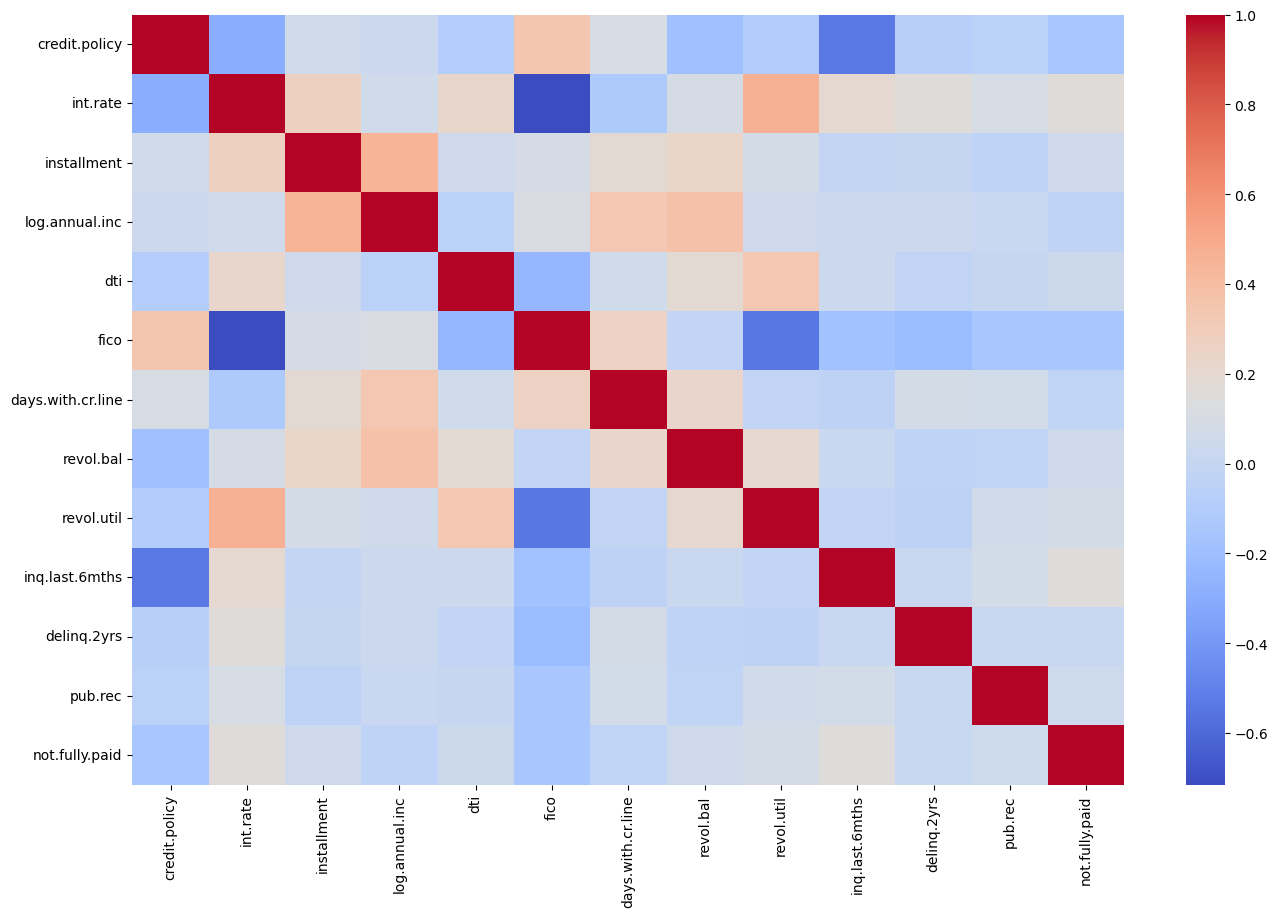

In [20]:
plt.figure(figsize = (16,10))

sns.heatmap(df.corr(numeric_only = True), cmap = 'coolwarm')

In [22]:
# Data preprocessing
le = LabelEncoder()
df['purpose'] = le.fit_transform(df['purpose'])  # Encode categorical feature

In [28]:
X = df.drop(columns=['not.fully.paid']) 
Y = df['not.fully.paid'] 

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [36]:
# Feature scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [38]:
# Train model
model = RandomForestClassifier(n_estimators = 100, random_state = 1)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [40]:
# Predictions
y_pred = model.predict(x_test)

In [42]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8308977035490606

In [44]:
cl = classification_report(y_test, y_pred)
print(cl)

              precision    recall  f1-score   support

           0       0.83      0.99      0.91      1593
           1       0.47      0.02      0.04       323

    accuracy                           0.83      1916
   macro avg       0.65      0.51      0.47      1916
weighted avg       0.77      0.83      0.76      1916



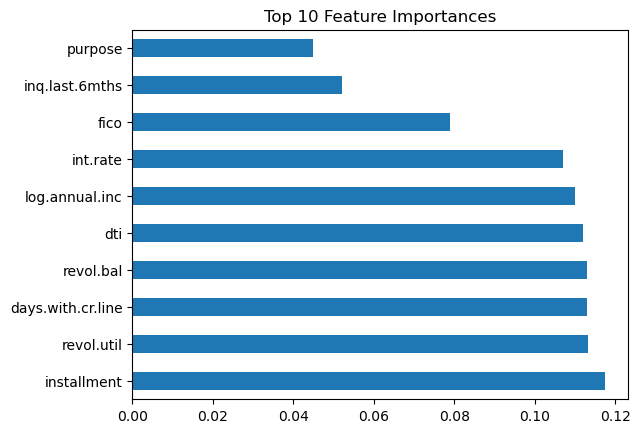

In [48]:
# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index = df.drop(columns = ['not.fully.paid']).columns)
feature_importances.nlargest(10).plot(kind = 'barh')
plt.title("Top 10 Feature Importances")
plt.show()

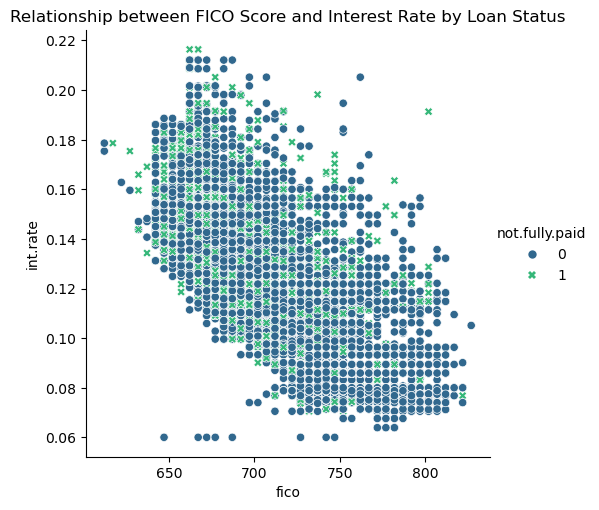

In [50]:
sns.relplot(data = df, x = 'fico', y = 'int.rate', hue = 'not.fully.paid', 
            style = 'not.fully.paid', palette = 'viridis')

plt.title('Relationship between FICO Score and Interest Rate by Loan Status')
plt.show()

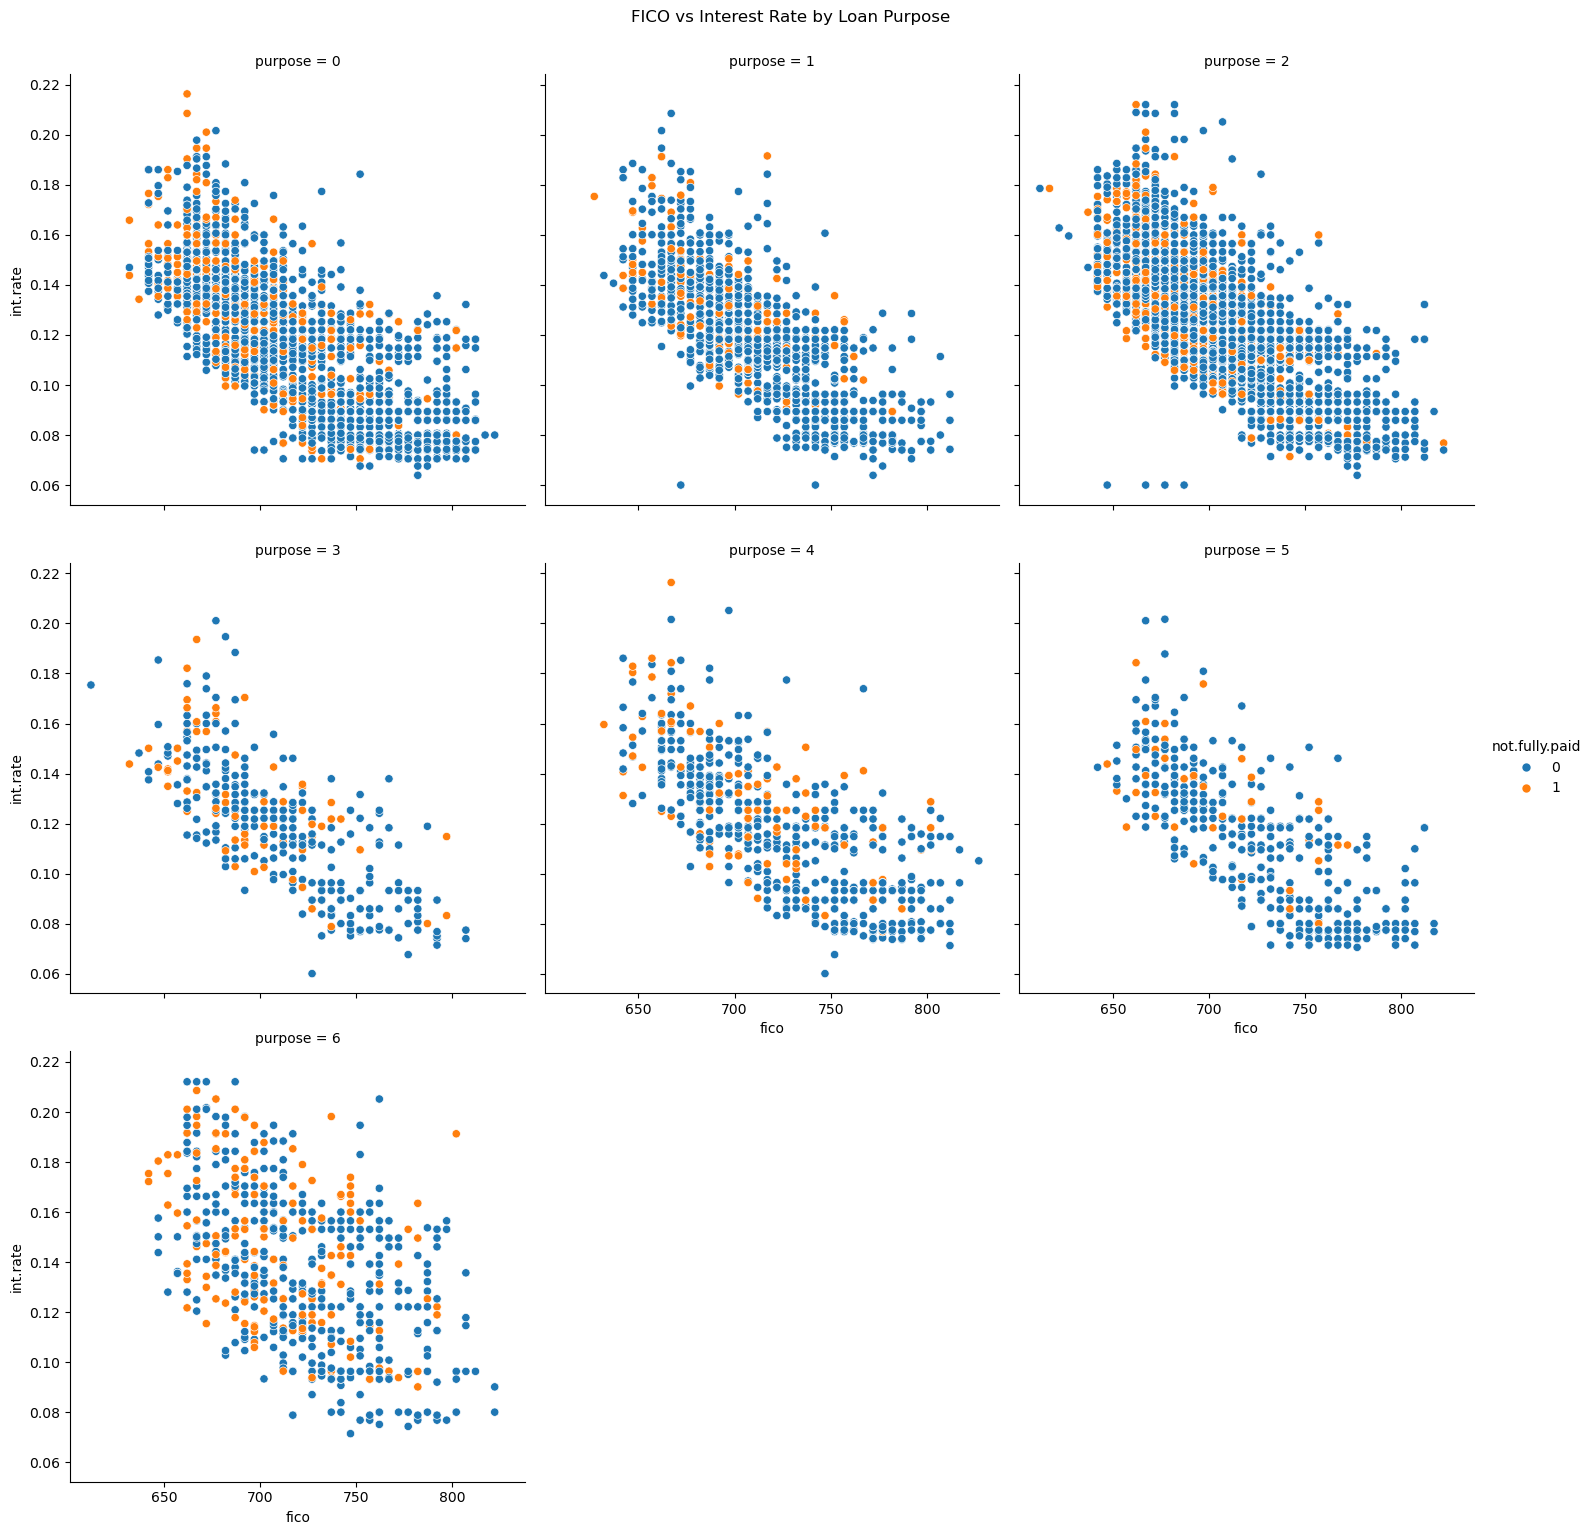

In [52]:
sns.relplot(data = df, x = 'fico', y = 'int.rate', col = 'purpose', 
            hue = 'not.fully.paid', col_wrap = 3, kind = 'scatter')

plt.suptitle('FICO vs Interest Rate by Loan Purpose', y = 1.02)
plt.show()

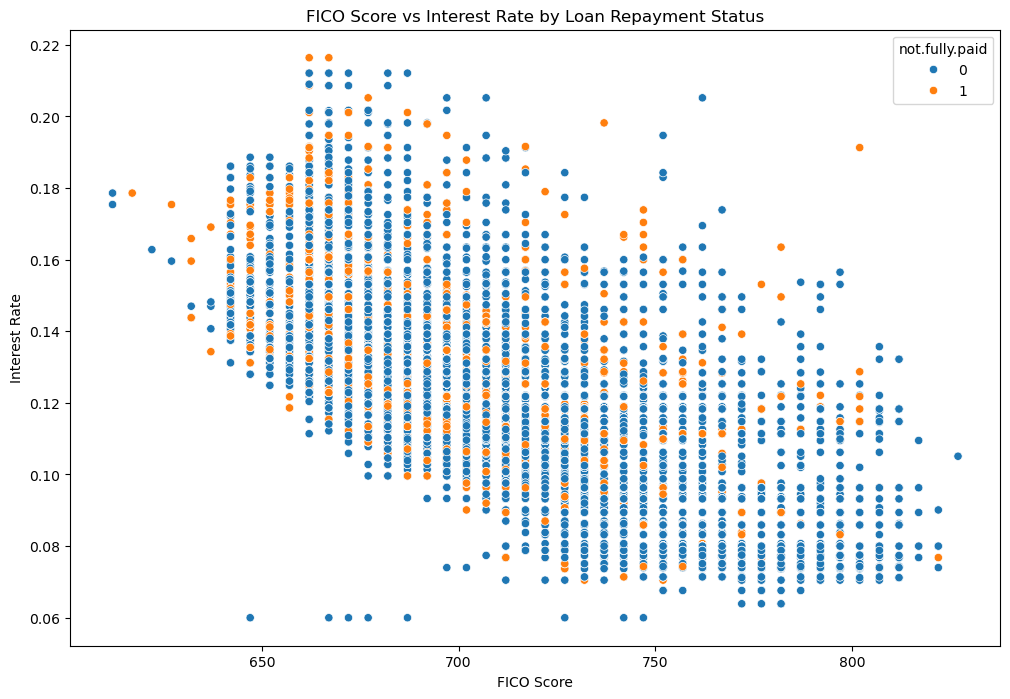

In [58]:
plt.figure(figsize = (12,8))

sns.scatterplot(data = df, x = 'fico', y = 'int.rate', hue = 'not.fully.paid')

plt.title('FICO Score vs Interest Rate by Loan Repayment Status')
plt.xlabel('FICO Score')
plt.ylabel('Interest Rate')
plt.show()

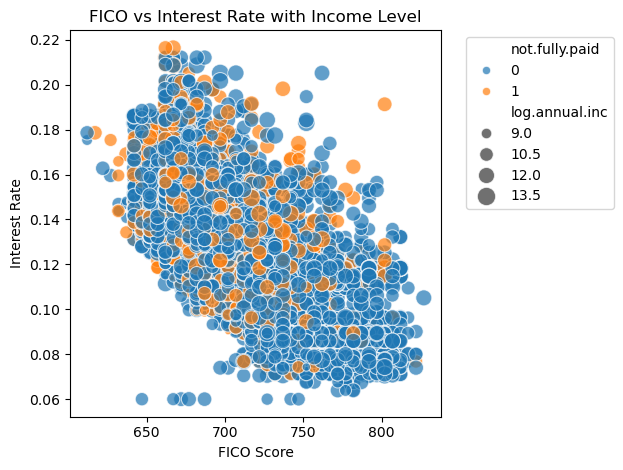

In [67]:
sns.scatterplot(data = df, x = 'fico', y = 'int.rate', 
                hue = 'not.fully.paid', size = 'log.annual.inc', 
                sizes = (20, 200), alpha = 0.7)

plt.title('FICO vs Interest Rate with Income Level')
plt.xlabel('FICO Score')
plt.ylabel('Interest Rate')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.tight_layout()
plt.show()

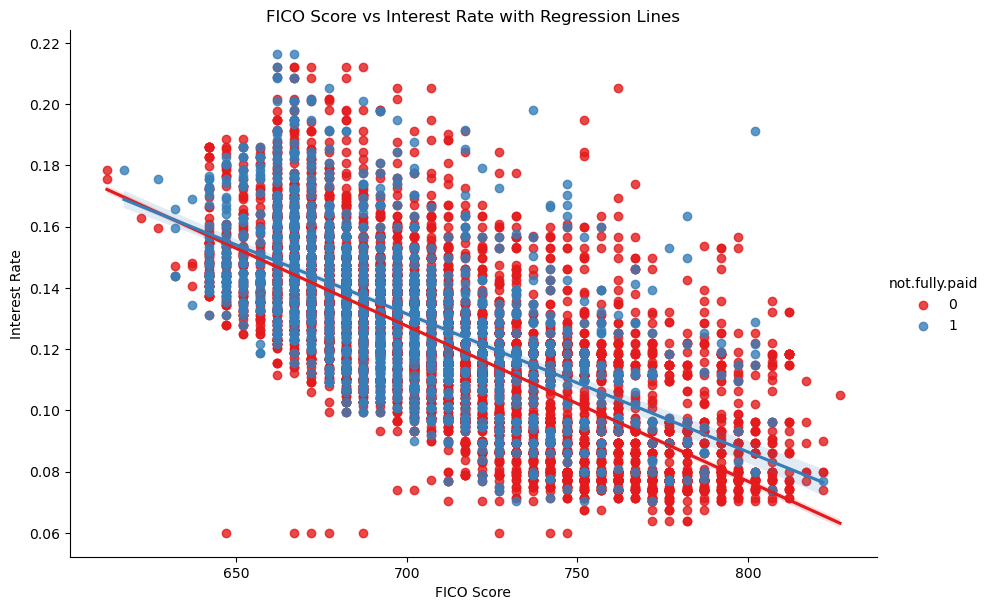

In [69]:
sns.lmplot(data = df, x = 'fico', y = 'int.rate', hue = 'not.fully.paid', 
           palette = 'Set1', height = 6, aspect = 1.5)

plt.title('FICO Score vs Interest Rate with Regression Lines')
plt.xlabel('FICO Score')
plt.ylabel('Interest Rate')
plt.show()